In [1]:
import folium as fo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data

transect_A = pd.read_csv('folium-demo/across_map.csv')
transect_B = pd.read_csv('folium-demo/through_map.csv')

In [3]:
# Check if Transect A data properly imported
transect_A.head()

,direction,stake,latitude,longitude,description_no,29-May,13-Jun,23-Jun,10-Jul,22-Jul,08-Aug
0,across,0,48.67953,-68.03368,8,0,0,0,0,0,0
1,across,20,48.67940,-68.03348,3,0,0,0,0,0,0
2,across,40,48.67926,-68.03331,6,1,0,0,1,0,0
3,across,60,48.67913,-68.03299,3,1,1,2,0,3,0
4,across,80,48.67885,-68.03283,3,1,1,1,1,0,0


In [4]:
# Check if Transect B data properly imported
transect_B.head()

,direction,stake,latitude,longitude,description_no,30-May,13-Jun,23-Jun,11-Jul,22-Jul,09-Aug
0,through,0,48.675417,-68.028278,2,0,-1,0,0,0,0
1,through,20,48.675333,-68.028278,1,494,-1,402,256,182,246
2,through,40,48.675222,-68.028528,1,20,-1,41,4,1,2
3,through,60,48.675139,-68.028722,1,13,-1,1,2,10,4
4,through,80,48.675028,-68.028972,2,5,-1,1,2,4,0


In [5]:
A_reformatted = pd.melt(transect_A, id_vars=['stake'], value_vars=['29-May', '13-Jun', '23-Jun', '10-Jul', '22-Jul', '08-Aug'])
B_reformatted = pd.melt(transect_B, id_vars=['stake'], value_vars=['30-May', '13-Jun', '23-Jun', '11-Jul', '22-Jul', '09-Aug'])

Text(0.5, 1.0, 'Total Number Found in Each Section per Sample Date for Transect A')

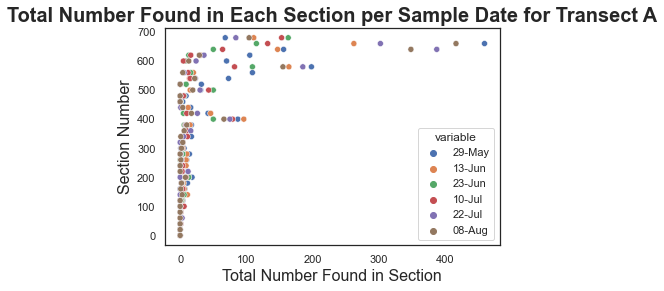

In [6]:
# Scatter plot of totals for each sample date
sns.set(style = 'white')
sns.scatterplot(data=A_reformatted, x='value', y='stake', hue='variable')
plt.xlabel('Total Number Found in Section', size = 16)
plt.ylabel('Section Number', size = 16)
plt.title("Total Number Found in Each Section per Sample Date for Transect A", size = 20, weight = 'bold')

Text(0.5, 1.0, 'Total Number Found in Each Section per Sample Date for Transect B')

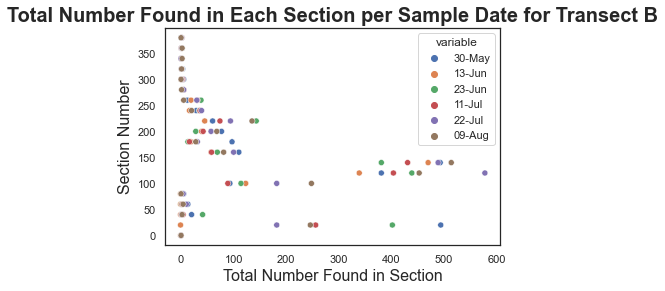

In [7]:
sns.set(style = 'white')
sns.scatterplot(data=B_reformatted, x='value', y='stake', hue='variable')
plt.xlabel('Total Number Found in Section', size = 16)
plt.ylabel('Section Number', size = 16)
plt.title("Total Number Found in Each Section per Sample Date for Transect B", size = 20, weight = 'bold')

In [8]:
# Initialize folium map with tiles set to cartodbpositron for easy viewing
# and at specific latitude and longitude to easily view the study site
init_lat = 48.67515
init_long = -68.02918

mp = fo.Map(tiles='cartodbpositron', location=[init_lat, init_long], zoom_start=15)

In [9]:
stakesLayer = fo.FeatureGroup(name="Stakes").add_to(mp)

# Add stake positions
# Add pop-up tile saying how many total at each stake position per date

for pt in transect_A.itertuples():
    fo.CircleMarker([pt.latitude, pt.longitude],
                    popup = (42),
                    radius=0.2).add_to(stakesLayer)

for pt in transect_B.itertuples():
    fo.CircleMarker([pt.latitude, pt.longitude], 
                    radius=0.2).add_to(stakesLayer)


In [10]:
transect_A['tuples'] = list(zip(transect_A['latitude'], transect_A['longitude']))
transect_B['tuples'] = list(zip(transect_B['latitude'], transect_B['longitude']))

In [11]:
list_colors = ['#ff8c00', '#00ffff', '#6495ed', '#228b22', '#9370db', '#ff0000', '#00ff7f', '#ffff00', '#ffc0cb']

In [12]:
A_descLayer = fo.FeatureGroup(name="Transect A Section Descriptions").add_to(mp)
B_descLayer = fo.FeatureGroup(name="Transect B Section Descriptions").add_to(mp)

fo.ColorLine(
        positions = transect_A['tuples'], # tuple of coordinates 
        colors = transect_A['description_no'], # map each segment with the description 
        colormap = list_colors, # map each value with a color 
        weight = 3
        ).add_to(A_descLayer)

fo.ColorLine(
        positions = transect_B['tuples'], # tuple of coordinates 
        colors = transect_B['description_no'], # map each segment with the description 
        colormap = list_colors, # map each value with a color 
        weight = 3
        ).add_to(B_descLayer)

In [13]:
def create_sample_dates(layer_name, transect, count):
    for index, row in transect.iterrows():
        if index == len(transect.index)-1:
            break
        else:
            df2 = transect.iloc[[index,index+1],:]
            fo.ColorLine(
                    positions = df2['tuples'], # tuple of coordinates 
                    colors = transect['description_no'], # map each segment with the description 
                    colormap = list_colors, # map each value with a color
                    weight = 0.5+(transect.iloc[index,count]/100)
                    ).add_to(layer_name)

In [14]:
A_mayLayer = fo.FeatureGroup(name="Transect A May 29 Totals").add_to(mp)
A_jun1Layer = fo.FeatureGroup(name="Transect A June 13 Totals").add_to(mp)
A_jun2Layer = fo.FeatureGroup(name="Transect A June 23 Totals").add_to(mp)
A_jul1Layer = fo.FeatureGroup(name="Transect A July 10 Totals").add_to(mp)
A_jul2Layer = fo.FeatureGroup(name="Transect A July 22 Totals").add_to(mp)
A_augLayer = fo.FeatureGroup(name="Transect A August 8 Totals").add_to(mp)

A_layerlist = [A_mayLayer, A_jun1Layer, A_jun2Layer, A_jul1Layer, A_jul2Layer, A_augLayer]

count = 5
for item in A_layerlist:
    create_sample_dates(item, transect_A, count)
    count += 1

In [15]:
B_mayLayer = fo.FeatureGroup(name="Transect B May 30 Totals").add_to(mp)
B_jun1Layer = fo.FeatureGroup(name="Transect B June 13 Totals").add_to(mp)
B_jun2Layer = fo.FeatureGroup(name="Transect B June 23 Totals").add_to(mp)
B_jul1Layer = fo.FeatureGroup(name="Transect B July 11 Totals").add_to(mp)
B_jul2Layer = fo.FeatureGroup(name="Transect B July 22 Totals").add_to(mp)
B_augLayer = fo.FeatureGroup(name="Transect B August 9 Totals").add_to(mp)

B_layerlist = [B_mayLayer, B_jun1Layer, B_jun2Layer, B_jul1Layer, B_jul2Layer, B_augLayer]

count = 5
for item in B_layerlist:
    create_sample_dates(item, transect_B, count)
    count += 1

In [16]:
fo.LayerControl().add_to(mp)
mp

In [17]:
df = pd.DataFrame(['mud', 'cobble', 'mussel bed', 'algae', 'boulder', 'mussel bed/algae', 'mussel bed/cobble', 'beach'],
                 columns=['Transect A section description'])

def style_specific_cell(x):
    color = 'background-color: aqua'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[2,0] = color
    df1.iloc[0,0] = 'background-color: darkorange'
    df1.iloc[1,0] = 'background-color: cornflowerblue'
    df1.iloc[3,0] = 'background-color: forestgreen'
    df1.iloc[4,0] = 'background-color: mediumpurple'
    df1.iloc[5,0] = 'background-color: red'
    df1.iloc[6,0] = 'background-color: springgreen'
    df1.iloc[7,0] = 'background-color: yellow'
    return df1

df.style.apply(style_specific_cell, axis=None)

,Transect A section description
0,mud
1,cobble
2,mussel bed
3,algae
4,boulder
5,mussel bed/algae
6,mussel bed/cobble
7,beach


In [18]:
df1 = pd.DataFrame(['mud', 'cobble', 'mussel bed', 'algae', 'boulder', 'mussel bed/algae'],
                 columns=['Transect B section description'])

def style_cell(x):
    color = 'background-color: aqua'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[2,0] = color
    df1.iloc[0,0] = 'background-color: darkorange'
    df1.iloc[1,0] = 'background-color: cornflowerblue'
    df1.iloc[3,0] = 'background-color: forestgreen'
    df1.iloc[4,0] = 'background-color: mediumpurple'
    df1.iloc[5,0] = 'background-color: red'
    return df1

df1.style.apply(style_cell, axis=None)

,Transect B section description
0,mud
1,cobble
2,mussel bed
3,algae
4,boulder
5,mussel bed/algae
